<br><br>
<h1 align="center"> 02 Initial EDS </h1>
<h4 align="center"> ( Basic Data Visualization ) </h4>
<br><br>

In [1]:
'''import thpe libraries'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

In [2]:
'''load the data. It's big, set low_memory=False'''
loan_data = pd.read_csv('/opt/apps/ml-data/bigdata/lending_club/loan_data.csv', low_memory=False)
# cols = [0]
# loan_data.drop(loan_data.columns[cols], axis=1, inplace=True)

In [3]:
'''How many rows and columns?'''
print(loan_data.shape)

(1340973, 38)


In [4]:
'''
A first look at the data, null values, data types, unique values etc.
Check which columns are having all null values. We need to drop those columns.
Also, check the columns having one or more null values. We need to take care of them.
'''
cols = loan_data.columns
null_count = 0
null_pct = 'None'
d = []
d_types = loan_data.dtypes

for ind, col in enumerate(cols):
    if loan_data[col].isnull().all():
        null_count = 'all'
        null_pct = '100%'
    else:
        null_count = loan_data[col].isnull().sum()
        total_records = len(loan_data)
        if null_count > 0:
            null_pct = 'Missing Values'
        else:
            null_pct = 'None'
    

    d.append({'col': col, 'null_count': null_count, 'null_pct': null_pct, 'd_type': d_types[col], 
              'n_unique': loan_data[col].nunique()})
    null_count = 0
    null_pct = 'None'
    
    
loan_data_info = pd.DataFrame(d)

# Write the loan_data_info to CSV file
# loan_data_info.to_csv('loan_features.csv', sep=',', encoding='UTF-8')

# Write the loan_data_info to .xlsx file
#loan_data_info.to_csv('loan_features.xlsx')

# Display the dataframe as HTML table
display(HTML(loan_data_info.to_html()))

,col,null_count,null_pct,d_type,n_unique
0,loan_amnt,0,None,int64,1562
1,term,0,None,object,2
2,int_rate,0,None,float64,672
3,installment,0,None,float64,83593
4,grade,0,None,object,7
5,sub_grade,0,None,object,35
6,emp_length,0,None,object,11
7,home_ownership,0,None,object,6
8,annual_inc,0,None,float64,64248
9,verification_status,0,None,object,3


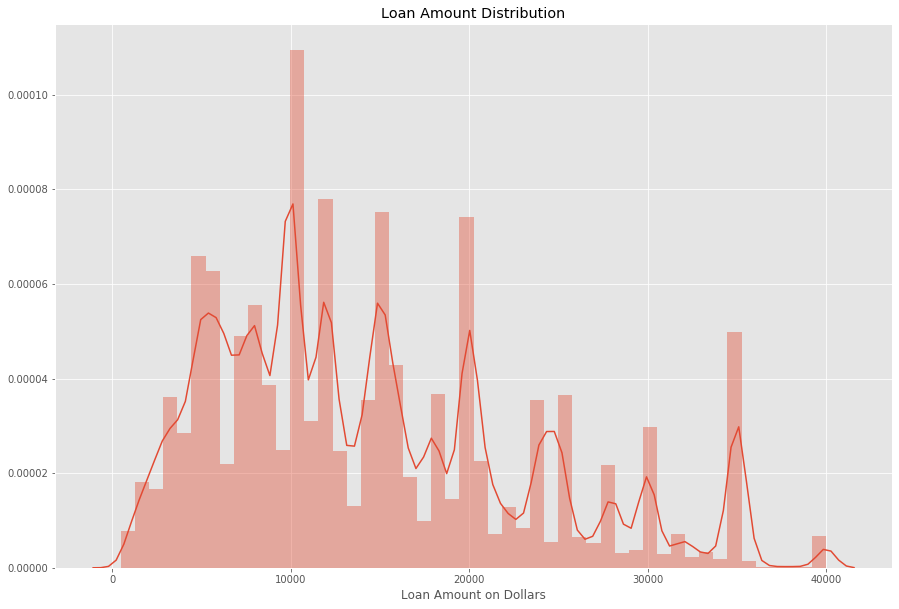

In [5]:
'''Loan Amount Distribution'''
plt.style.use('ggplot')
plt.figure(figsize=(15, 10))

sns.distplot(loan_data['loan_amnt'])

plt.xlabel("Loan Amount on Dollars")
plt.title("Loan Amount Distribution")

plt.show()

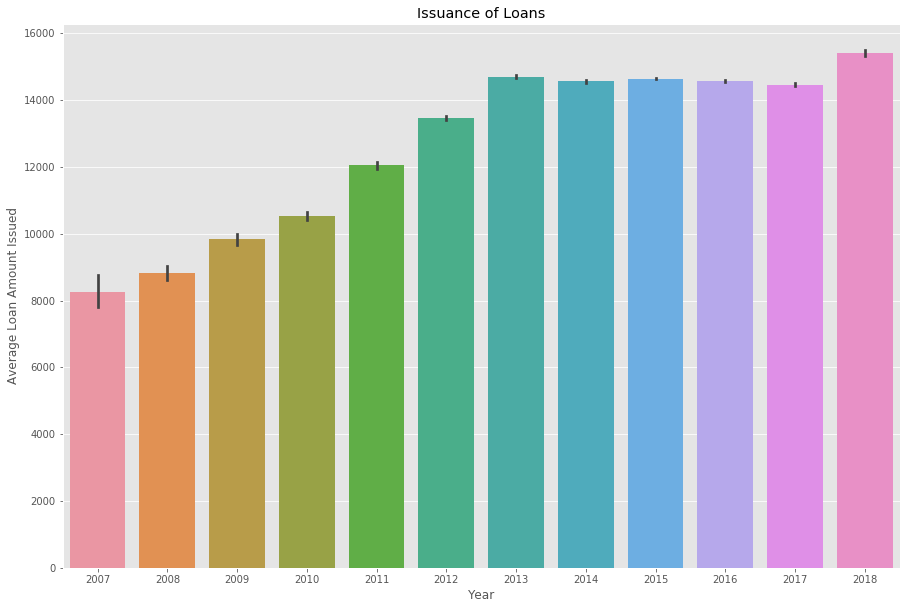

In [6]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 10))

loan_data['issue_d'] = loan_data['issue_d'].astype('datetime64[ns]')
sns.barplot(loan_data['issue_d'].dt.year, 'loan_amnt', data=loan_data)

plt.title('Issuance of Loans')
plt.xlabel('Year')
plt.ylabel('Average Loan Amount Issued')

plt.show()

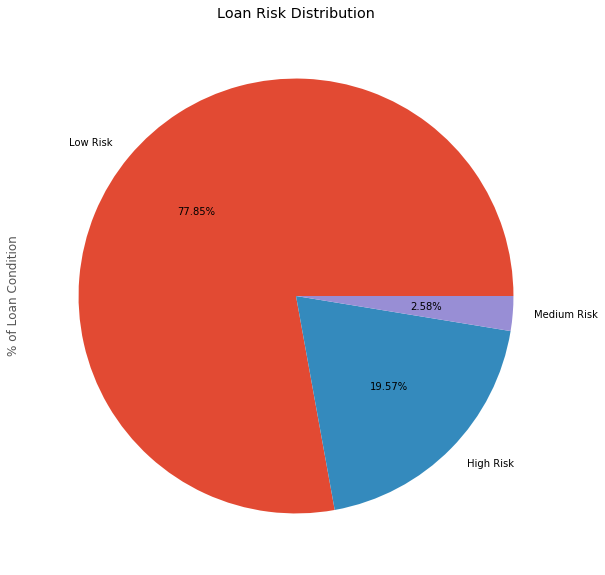

In [7]:
plt.figure(figsize=(15, 10))

risk_counts = loan_data['risk'].value_counts()
risk_counts.plot.pie(autopct='%1.2f%%')

plt.title('Loan Risk Distribution')
plt.xlabel('')
plt.ylabel('% of Loan Condition')

plt.show()

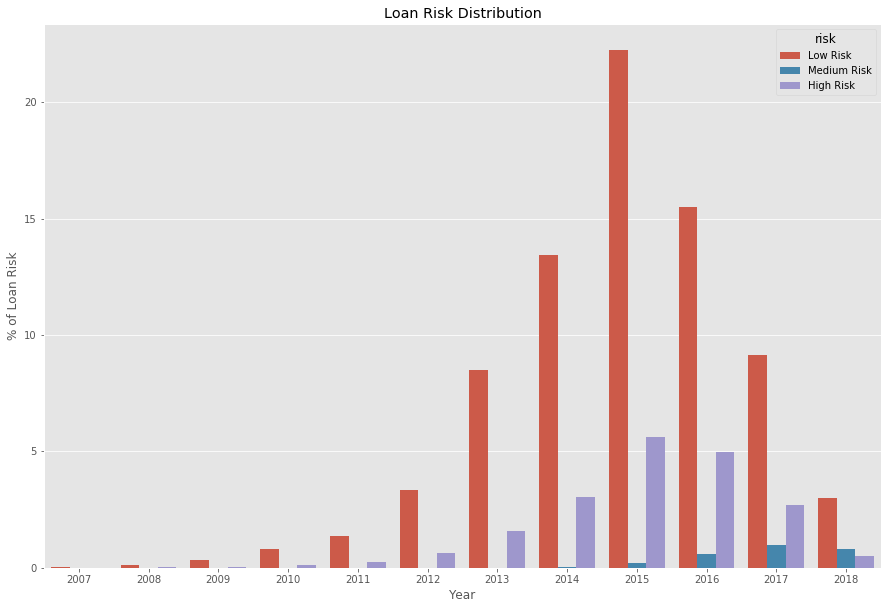

In [8]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 10))

sns.barplot(x=loan_data['issue_d'].dt.year, y="loan_amnt", 
            hue="risk", data=loan_data, 
            estimator=lambda x: len(x) / len(loan_data) * 100)

plt.title('Loan Risk Distribution')
plt.xlabel('Year')
plt.ylabel('% of Loan Risk')

plt.show()

In [9]:
loan_data['addr_state'].unique()

'''Make a list with each of the regions by state.'''
west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']


loan_data['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'South West'
    elif state in south_east:
        return 'South East'
    elif state in mid_west:
        return 'Mid West'
    elif state in north_east:
        return 'North East'


loan_data['region'] = loan_data['addr_state'].apply(finding_regions)
loan_data['region'].value_counts()

South East    324228
West          319059
North East    302534
Mid West      233225
South West    161927
Name: region, dtype: int64

In [10]:
by_loan_amount = loan_data.groupby(['region','addr_state'], as_index=False).loan_amnt.sum()
by_interest_rate = loan_data.groupby(['region', 'addr_state'], as_index=False).int_rate.mean()
by_income = loan_data.groupby(['region', 'addr_state'], as_index=False).annual_inc.mean()

'''Take the values to a list for visualization purposes.'''
states = by_loan_amount['addr_state'].values.tolist()
average_loan_amounts = by_loan_amount['loan_amnt'].values.tolist()
average_interest_rates = by_interest_rate['int_rate'].values.tolist()
average_annual_income = by_income['annual_inc'].values.tolist()


from collections import OrderedDict

metrics_data = OrderedDict([('state_codes', states),
                            ('issued_loans', average_loan_amounts),
                            ('interest_rate', average_interest_rates),
                            ('annual_income', average_annual_income)])
                     

metrics_df = pd.DataFrame.from_dict(metrics_data)
metrics_df = metrics_df.round(decimals=2)
metrics_df.head()

,state_codes,issued_loans,interest_rate,annual_income
0,IA,114075,12.63,44756.21
1,IL,757873225,13.15,77943.09
2,IN,303733925,13.47,68986.51
3,KS,157123425,13.20,69771.31
4,MI,485811550,13.43,70058.66


In [40]:
'''Now it comes the part where we plot out plotly United States map'''
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot


for col in metrics_df.columns:
    metrics_df[col] = metrics_df[col].astype(str)
    
scl = [[0.0, 'rgb(210, 241, 198)'],[0.2, 'rgb(188, 236, 169)'],[0.4, 'rgb(171, 235, 145)'],\
            [0.6, 'rgb(140, 227, 105)'],[0.8, 'rgb(105, 201, 67)'],[1.0, 'rgb(59, 159, 19)']]

metrics_df['text'] = metrics_df['state_codes'] + '<br>' +\
'Average loan interest rate: ' + metrics_df['interest_rate'] + '<br>'+\
'Average annual income: ' + metrics_df['annual_income'] 


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = metrics_df['state_codes'],
        z = metrics_df['issued_loans'], 
        locationmode = 'USA-states',
        text = metrics_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "$s USD")
        ) ]


layout = dict(
    title = 'Geographical Distribution of Loans',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

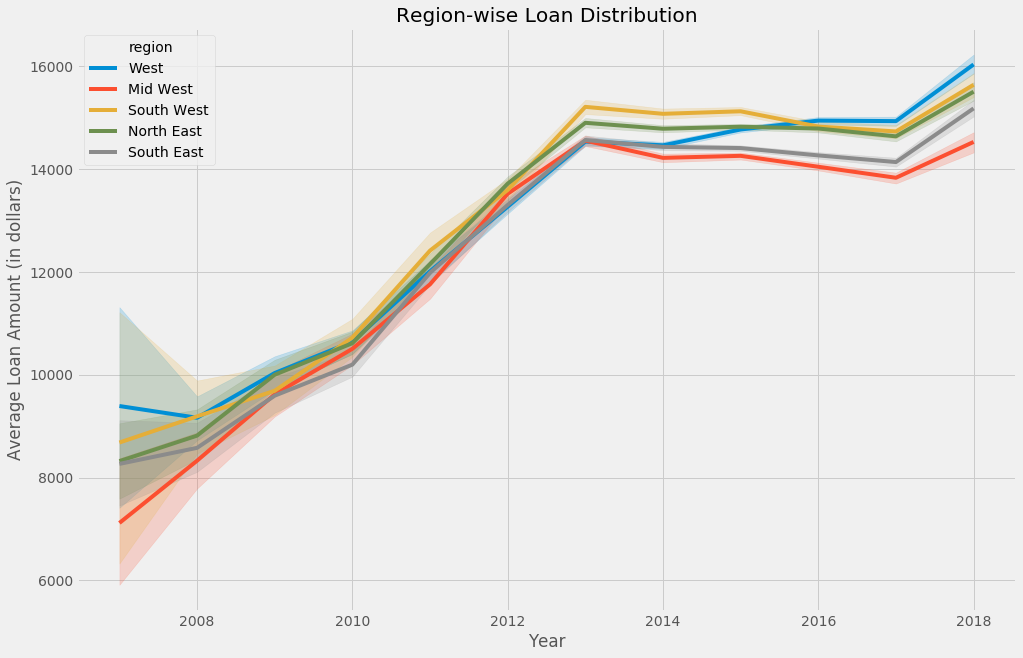

In [49]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))

sns.lineplot(x=loan_data['issue_d'].dt.year, y="loan_amnt", hue="region", data=loan_data)

plt.title('Region-wise Loan Distribution')
plt.xlabel('Year')
plt.ylabel('Average Loan Amount (in dollars)')

plt.show()